In [21]:
import sys, os
import numpy as np

sys.path.append(os.path.abspath('./'))
from pysplendor.game import Trajectory, traj_loader
from pysplendor.splendor import SplendorGameState, CARD_LEVELS, Action, ActionType, CHANCE_PLAYER, ACTIONS_STR, ACTIONS
from prepare_data import SplendorGameStateEncoder
import matplotlib.pyplot as plt

In [22]:
traj_file = os.path.abspath('./data_2304/traj_train.txt')
state_encoder = SplendorGameStateEncoder(2)
STATE_LEN = 1052
NUM_ACTIONS = 43
MAX_MOVES = 40

state_bit_counts = np.zeros(shape=(STATE_LEN,))
action_counts = [0] * NUM_ACTIONS
move_action_counts = [[0] * NUM_ACTIONS for _ in range(MAX_MOVES)]

num_states = 0
for traj in traj_loader(traj_file):
    state = traj.initial_state.copy()
    move_num = 0
    for action in traj.actions:
        if state.active_player() != CHANCE_PLAYER: # ignore chance nodes
            state_vec = state_encoder.state_to_vec(state)
            state_bit_counts += np.array(state_vec)
            num_states += 1
            action_counts[action] += 1
            if move_num < MAX_MOVES * 2:
                move_action_counts[move_num // 2][action] += 1
            move_num += 1

        state.apply_action(action)


KeyboardInterrupt: 

In [25]:
traj_file = os.path.abspath('./data_2304/traj_train.txt')
NUM_ACTIONS = 43
MAX_MOVES = 40

num_states = 0
action_counts = [0] * NUM_ACTIONS
move_action_counts = [[0] * NUM_ACTIONS for _ in range(MAX_MOVES)]

for traj in traj_loader(traj_file):
    move_num = 0
    for action in traj.actions:
        if action < NUM_ACTIONS: # ignore chance nodes
            action_counts[action] += 1
            if move_num < MAX_MOVES * 2:
                move_action_counts[move_num // 2][action] += 1
            move_num += 1
            num_states += 1


In [26]:
print(f'num states: {num_states}')
print(f'sum action counts: {sum(action_counts)}')
for n, action_str in enumerate(ACTIONS_STR[:NUM_ACTIONS]):
    print(f'{action_str}: {action_counts[n]} {action_counts[n] / num_states * 100:.2f}%')

probs = [action_counts[n] / num_states for n in range(NUM_ACTIONS)]
print(','.join([f'{p:.4f}' for p in probs]))

num states: 562582
sum action counts: 562582
s: 35297 6.27%
tr2: 3305 0.59%
tg2: 3349 0.60%
tb2: 3303 0.59%
tw2: 3388 0.60%
tk2: 3217 0.57%
tr1g1b1: 21528 3.83%
tr1g1w1: 21160 3.76%
tr1g1k1: 21101 3.75%
tr1b1w1: 21179 3.76%
tr1b1k1: 20975 3.73%
tr1w1k1: 21380 3.80%
tg1b1w1: 21561 3.83%
tg1b1k1: 20943 3.72%
tg1w1k1: 21209 3.77%
tb1w1k1: 21284 3.78%
r0n0: 0 0.00%
r0n1: 0 0.00%
r0n2: 0 0.00%
r0n3: 0 0.00%
r1n0: 0 0.00%
r1n1: 0 0.00%
r1n2: 0 0.00%
r1n3: 0 0.00%
r2n0: 0 0.00%
r2n1: 0 0.00%
r2n2: 0 0.00%
r2n3: 0 0.00%
p0n0: 39508 7.02%
p0n1: 45987 8.17%
p0n2: 56845 10.10%
p0n3: 83896 14.91%
p1n0: 12309 2.19%
p1n1: 12857 2.29%
p1n2: 14343 2.55%
p1n3: 18913 3.36%
p2n0: 3367 0.60%
p2n1: 3492 0.62%
p2n2: 3406 0.61%
p2n3: 3480 0.62%
h0: 0 0.00%
h1: 0 0.00%
h2: 0 0.00%
0.0627,0.0059,0.0060,0.0059,0.0060,0.0057,0.0383,0.0376,0.0375,0.0376,0.0373,0.0380,0.0383,0.0372,0.0377,0.0378,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0702,0.0817,0.1010,0.1491,0.0219,0

In [20]:
# print as a csv

print(','.join(['move_num'] + ACTIONS_STR + ['total']))
for move_num in range(MAX_MOVES):
    counts = move_action_counts[move_num]
    total = sum(counts)
    row = [str(move_num)] + [str(counts[a]) for a in range(NUM_ACTIONS)] + [str(total)]
    print(','.join(row))


move_num,s,tr2,tg2,tb2,tw2,tk2,tr1g1b1,tr1g1w1,tr1g1k1,tr1b1w1,tr1b1k1,tr1w1k1,tg1b1w1,tg1b1k1,tg1w1k1,tb1w1k1,r0n0,r0n1,r0n2,r0n3,r1n0,r1n1,r1n2,r1n3,r2n0,r2n1,r2n2,r2n3,p0n0,p0n1,p0n2,p0n3,p1n0,p1n1,p1n2,p1n3,p2n0,p2n1,p2n2,p2n3,h0,h1,h2,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,total
0,9,61,58,71,60,68,298,362,351,295,277,317,390,359,330,339,990,917,1062,895,84,88,64,90,36,41,52,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8000
1,3,20,11,18,18,15,397,347,363,397,326,426,455,354,348,340,984,782,842,894,109,126,134,128,31,45,45,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8000
2,4,2,0,0,1,0,390,367,447,386,356,388,406,329,413,404,768,951,866,829,128,133,124,132,52,38,37,47,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8000
3,21,1,0,1,0,0,402,418,442,449,335,373,334,315,416,398,651,603,626,804,108,101,93,80,41,46,34,45,215,169,220,253,0,0,0,0,0,0,0,0,6,0,0,8000
4,12,0,0,0,1,0,131,137,145,188,150,138,158,159,192,151,416

In [27]:
# print as a single vector for ConstantPolicy

probs = []
for move_num in range(30):
    counts = move_action_counts[move_num]
    total = sum(counts)
    probs.extend([c/total for c in counts])

print(probs)

[0.0, 0.04135, 0.04225, 0.03855, 0.04115, 0.0393, 0.08235, 0.08085, 0.0792, 0.0795, 0.0792, 0.08255, 0.07605, 0.07955, 0.0767, 0.08145, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01085, 0.01015, 0.01075, 0.01095, 0.0101, 0.0991, 0.0924, 0.0894, 0.09695, 0.09305, 0.0933, 0.0962, 0.09335, 0.0982, 0.09525, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0157, 0.0049, 0.0048, 0.0045, 0.00415, 0.0052, 0.0813, 0.0777, 0.0798, 0.0794, 0.0791, 0.0798, 0.0824, 0.0787, 0.0811, 0.08065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0398, 0.0402, 0.0428, 0.038, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07335, 0.0027, 0.0026, 0.0024, 0.0025, 0.0022, 0.01735, 0.0186, 0.01805, 0.01915, 0.01725, 0.018, 0.01815, 0.01665, 0.0189, 0.01955, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [6]:
num_nonzero = sum([1 for x in state_bit_counts if x > 0])
print(f'nonzero bits: {num_nonzero} of {STATE_LEN}')
print('percentage of 1-s in each state position')
for n, freq in enumerate(state_bit_counts):
    if freq > 0:
        print(f'{n}: {freq / num_states * 100:.2f}%')
# print(state_bit_counts)

nonzero bits: 827 of 1052
percentage of 1-s in each state position
0: 49.18%
3: 29.58%
4: 21.10%
5: 49.94%
8: 30.33%
9: 19.59%
10: 51.20%
13: 30.53%
14: 18.14%
15: 50.88%
18: 29.13%
19: 19.85%
20: 48.51%
23: 30.05%
24: 21.31%
25: 99.87%
30: 49.00%
33: 30.63%
34: 19.45%
35: 48.65%
38: 29.13%
39: 21.30%
40: 49.67%
43: 28.97%
44: 20.44%
45: 50.29%
48: 29.82%
49: 18.97%
50: 50.02%
53: 30.26%
54: 18.80%
55: 99.08%
60: 49.16%
63: 26.59%
64: 19.56%
65: 47.67%
68: 27.03%
69: 20.60%
70: 48.51%
73: 28.36%
74: 18.44%
75: 45.40%
78: 31.37%
79: 18.54%
80: 47.75%
83: 28.95%
84: 18.61%
85: 95.31%
90: 20.47%
91: 21.32%
92: 19.06%
93: 20.91%
94: 18.24%
96: 79.91%
97: 20.09%
102: 53.62%
103: 22.84%
104: 13.95%
105: 5.41%
106: 4.18%
107: 54.96%
108: 23.46%
109: 13.16%
110: 4.93%
111: 3.49%
112: 53.06%
113: 23.55%
114: 13.41%
115: 6.50%
116: 3.49%
117: 52.35%
118: 22.98%
119: 13.63%
120: 6.58%
121: 4.46%
122: 52.77%
123: 24.11%
124: 13.61%
125: 5.04%
126: 4.48%
127: 100.00%
132: 19.70%
133: 20.26%
134: 19

In [ ]:
# look at model predictions for a particular trajectory
import torch
from train import TwoHeadMLP
from prepare_data import SplendorGameStateEncoder, PLAYER_ACTIONS

def model_predict(model, state_encoder, state, K=5):
    '''Retruns top K predicted actions and qvalue'''
    state_vec = state_encoder.state_to_vec(state)
    X = torch.tensor(state_vec, dtype=torch.float32)
    logits, qval = model.forward(X)
    top_actions = np.argsort(logits.detach().numpy())[-K:]
    logits = logits[top_actions]
    return top_actions, logits, qval.item()

def run_model():
    '''Aloows to inspect the moves predicted by the model'''
    state_encoder = SplendorGameStateEncoder(2)
    STATE_LEN = 1052
    NUM_ACTIONS = 43

    model = TwoHeadMLP(STATE_LEN, 50, NUM_ACTIONS)
    model_path = './data/models/mlp_0.pth'
    state_dict = torch.load(model_path)
    model.load_state_dict(state_dict)
    model.eval()

    traj_file = './data/traj_dump_10k.txt'
    loader = traj_loader(traj_file)
    for _ in range(1100):
        next(loader)
    traj = next(loader) # pick one
    state = traj.initial_state.copy()
    rewards = traj.rewards

    for action in traj.actions:
        if state.active_player() != CHANCE_PLAYER: # ignore chance nodes
            top_actions, logits, qval = model_predict(model, state_encoder, state, K=5)
            print(state)
            suggested_actions = ' '.join([f'{PLAYER_ACTIONS[a]} ({l:.2f})' for a, l in zip(top_actions, logits)])
            print(f'predicted actions: {suggested_actions} qval: {qval:.3f} reward: {rewards[state.active_player()]}')
            print(f'actual action: {action}\n')

        state.apply_action(action)

run_model()

Traceback (most recent call last):
  File "/Users/seal/.vscode/extensions/ms-python.python-2025.2.0-darwin-arm64/python_files/python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
  File "<string>", line 7, in <module>
  File "/opt/homebrew/lib/python3.10/site-packages/torch/serialization.py", line 1471, in load
    return _load(
  File "/opt/homebrew/lib/python3.10/site-packages/torch/serialization.py", line 1964, in _load
    result = unpickler.load()
  File "/opt/homebrew/lib/python3.10/site-packages/torch/serialization.py", line 1953, in find_class
    return super().find_class(mod_name, name)
AttributeError: Can't get attribute 'TwoHeadMLP' on <module '__main__' from '/Users/seal/.vscode/extensions/ms-python.python-2025.2.0-darwin-arm64/python_files/python_server.py'>



In [ ]:
from pysplendor.agents import MCTSAgent, MCTS
# from prepare_data import ACTION_ID

def print_root_visits(mcts: MCTS):
    children_dict = {str(child.action): child for child in mcts.root.children}
    for action in PLAYER_ACTIONS:
        if action in children_dict:
            child = children_dict[action]
            print(f'{child.action}:\t{child.visits}')

    # children = sorted(mcts.root.children, key=lambda x: x.visits)
    # for child in children:
    #     print(f'{child.action}: {child.visits}')

def compare_mcts_variants():
    traj_file = './data/traj_dump.txt'
    loader = traj_loader(traj_file)
    # for _ in range(1100):
    #     next(loader)
    traj = next(loader) # pick one
    state = traj.initial_state.copy()
    rewards = traj.rewards

    for action in traj.actions:
        if state.active_player() != CHANCE_PLAYER: # ignore chance nodes
            print(state)
            agent1 = MCTS(state)
            agent2 = MCTS(state)

            action1 = agent1.search()
            action2 = agent2.search()

            print(f'action1: {action1} action2: {action2} actual action: {action}\n')
            print('\nagent1:')
            print_root_visits(agent1)
            print('\nagent2:')
            print_root_visits(agent2)

        state.apply_action(action)




Traceback (most recent call last):
  File "/Users/seal/.vscode/extensions/ms-python.python-2025.2.0-darwin-arm64/python_files/python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
  File "<string>", line 1, in <module>
  File "/Users/seal/projects/splendor/pysplendor/agents.py", line 5, in <module>
    from .mcts import MCTS
  File "/Users/seal/projects/splendor/pysplendor/mcts.py", line 5, in <module>
    from .game_state import GameState, CHANCE_PLAYER
ImportError: cannot import name 'CHANCE_PLAYER' from 'pysplendor.game_state' (/Users/seal/projects/splendor/pysplendor/game_state.py)



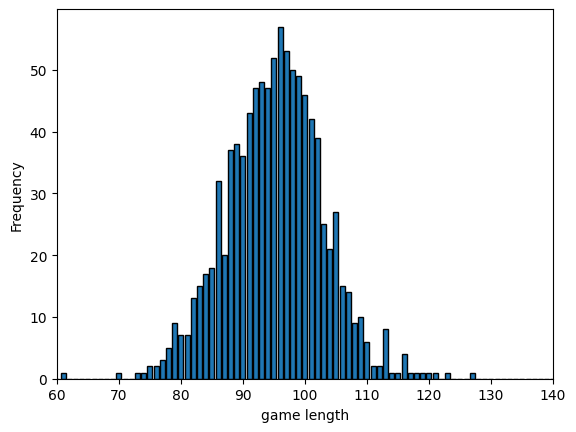

In [3]:
traj_file = os.path.abspath('./data/traj_dump_1k.txt')

max_len = 150
game_lens = [0] * max_len
for traj in traj_loader(traj_file):
    game_lens[len(traj.actions)] += 1

plt.bar(range(max_len), game_lens, edgecolor='black')

plt.xlabel('game length')
plt.ylabel('Frequency')
plt.xlim(60, 140)
plt.show()


